In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
semanal = pd.read_csv('semanal.csv')
semanal['pickup_datetime'] = pd.to_datetime(semanal['pickup_datetime'])
semanal.set_index('pickup_datetime', inplace=True)

# Semanal

In [4]:
semanal

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-03,269789,326037.65,3581465.58,2.044612e+06,189053
2023-09-10,774580,941741.78,11635454.86,6.986193e+06,588642
2023-09-17,782870,959974.79,12179688.56,7.395936e+06,606553
2023-09-24,341409,416200.11,5594414.93,3.412822e+06,276622
2023-10-01,771602,944911.79,11838656.66,7.086461e+06,595336
2023-10-08,801099,981060.43,12204336.29,7.349261e+06,611780
2023-10-15,792958,965088.12,12042382.50,7.287548e+06,604932
2023-10-22,833690,1025976.55,12831777.30,7.789044e+06,638659
2023-10-29,838860,1030375.53,12954809.18,7.852571e+06,643674


In [5]:
semanal_p = semanal['n_trips']

In [6]:
semanal_p

,n_trips
pickup_datetime,
2023-09-03,189053
2023-09-10,588642
2023-09-17,606553
2023-09-24,276622
2023-10-01,595336
2023-10-08,611780
2023-10-15,604932
2023-10-22,638659
2023-10-29,643674


In [7]:
semanal_p = semanal_p.reset_index()

In [8]:
semanal_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
semanal_p

,ds,y
0,2023-09-03,189053
1,2023-09-10,588642
2,2023-09-17,606553
3,2023-09-24,276622
4,2023-10-01,595336
5,2023-10-08,611780
6,2023-10-15,604932
7,2023-10-22,638659
8,2023-10-29,643674
9,2023-11-05,641573


# Evaluacion

## Modelo 1

In [15]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(
    daily_seasonality=False,    # Desactivar estacionalidad diaria
    yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
    weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
    uncertainty_samples=50,    # Ajustar número de muestras para análisis de incertidumbre
    interval_width=0.6          # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet_1.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet_1.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/acj_umyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/hyzpoxyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66469', 'data', 'file=/tmp/tmph6xbzut0/acj_umyt.json', 'init=/tmp/tmph6xbzut0/hyzpoxyd.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model5xuqra03/prophet_model-20241113205335.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:53:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:53:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-03,46902.589419,2.487090e+05,3.561059e+05,46902.589419,46902.589419,251742.486556,251742.486556,251742.486556,321574.555453,321574.555453,321574.555453,-69832.068898,-69832.068898,-69832.068898,0.0,0.0,0.0,2.986451e+05
1,2023-09-10,55499.144928,4.059041e+05,5.077093e+05,55499.144928,55499.144928,392211.646811,392211.646811,392211.646811,321574.555453,321574.555453,321574.555453,70637.091358,70637.091358,70637.091358,0.0,0.0,0.0,4.477108e+05
2,2023-09-17,64095.700437,4.520907e+05,5.560445e+05,64095.700437,64095.700437,446212.590651,446212.590651,446212.590651,321574.555453,321574.555453,321574.555453,124638.035198,124638.035198,124638.035198,0.0,0.0,0.0,5.103083e+05
3,2023-09-24,72692.255951,4.693178e+05,5.597937e+05,72692.255951,72692.255951,440307.194776,440307.194776,440307.194776,321574.555453,321574.555453,321574.555453,118732.639323,118732.639323,118732.639323,0.0,0.0,0.0,5.129995e+05
4,2023-10-01,81288.811463,4.718512e+05,5.735206e+05,81288.811463,81288.811463,436126.180296,436126.180296,436126.180296,321574.555453,321574.555453,321574.555453,114551.624843,114551.624843,114551.624843,0.0,0.0,0.0,5.174150e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2025-07-27,897961.586078,1.025421e+06,1.119029e+06,897961.569604,897961.603417,175552.304019,175552.304019,175552.304019,321574.555453,321574.555453,321574.555453,-146022.251434,-146022.251434,-146022.251434,0.0,0.0,0.0,1.073514e+06
100,2025-08-03,906558.141604,1.017875e+06,1.104578e+06,906558.124870,906558.159741,141099.908128,141099.908128,141099.908128,321574.555453,321574.555453,321574.555453,-180474.647325,-180474.647325,-180474.647325,0.0,0.0,0.0,1.047658e+06
101,2025-08-10,915154.697130,9.136385e+05,1.013648e+06,915154.680116,915154.716006,40595.577832,40595.577832,40595.577832,321574.555453,321574.555453,321574.555453,-280978.977621,-280978.977621,-280978.977621,0.0,0.0,0.0,9.557503e+05
102,2025-08-17,923751.252656,8.575763e+05,9.533950e+05,923751.234804,923751.272068,-23629.901215,-23629.901215,-23629.901215,321574.555453,321574.555453,321574.555453,-345204.456669,-345204.456669,-345204.456669,0.0,0.0,0.0,9.001214e+05


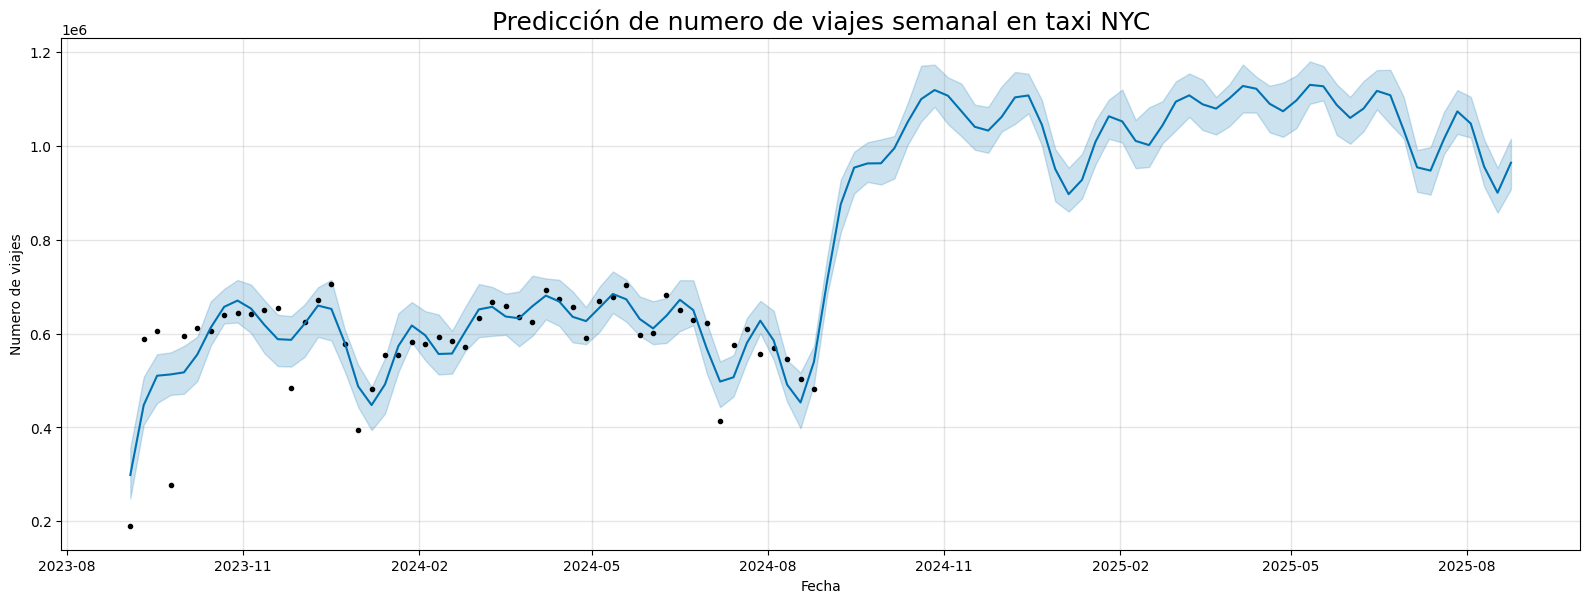

In [17]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes semanal en taxi NYC', fontsize = 18)
plt.show()

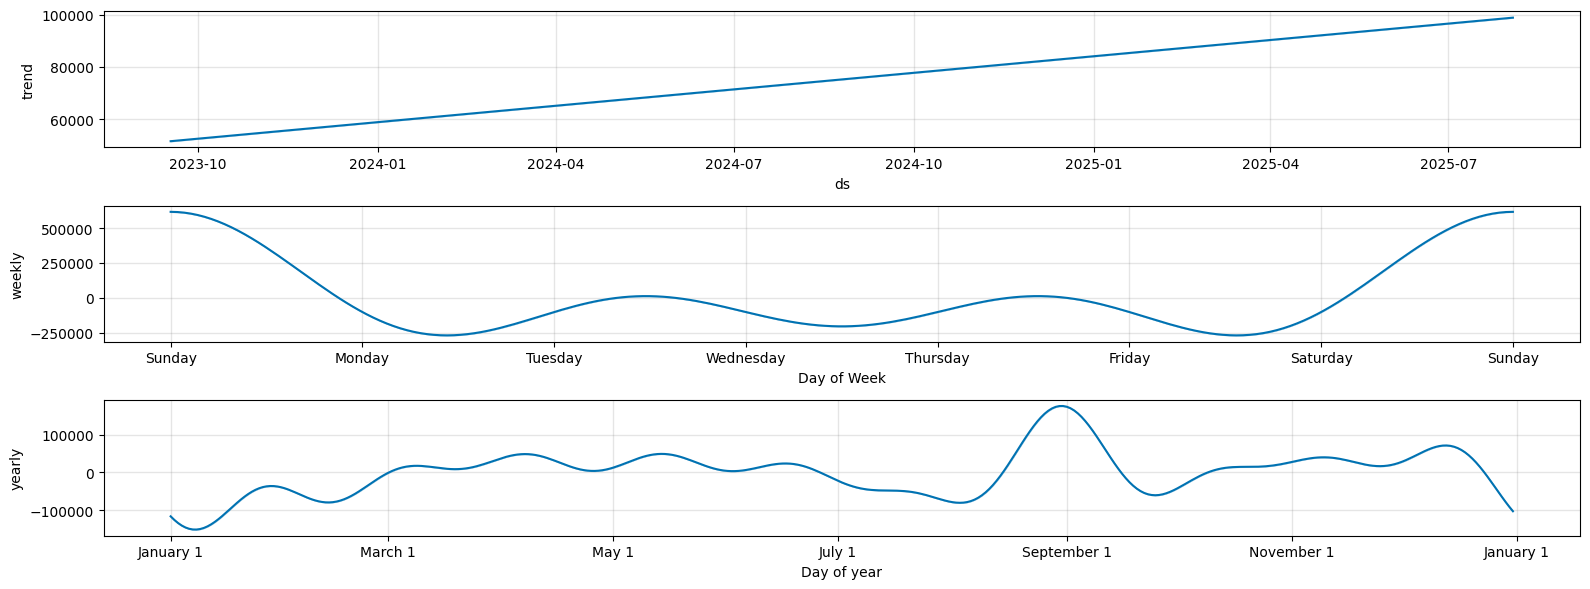

In [ ]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Modelo 2

In [18]:
# Instanciamos un modelo de Prophet

prophet_2 = Prophet(yearly_seasonality= True, weekly_seasonality= True,uncertainty_samples = 100, mcmc_samples=100, interval_width= 0.8)
#daily_seasonality=False,    # Desactivar estacionalidad diaria
 #   yearly_seasonality=True,    # Activar estacionalidad anual para capturar patrones del año completo
  #  weekly_seasonality=True,    # Activar estacionalidad semanal si hay patrones semanales
   # uncertainty_samples=100,    # Ajustar número de muestras para análisis de incertidumbre
    #interval_width=0.8
# Entrenamos el modelo
prophet_2.fit(semanal_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 52 semanas
build_forecast = prophet_2.make_future_dataframe(periods=52, freq='W') #

# Predecimos
forecast_2 = prophet_2.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/ktvwom3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/r_5_xvc4.json
20:54:18 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=97597', 'data', 'file=/tmp/tmph6xbzut0/ktvwom3d.json', 'init=/tmp/tmph6xbzut0/r_5_xvc4.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model42jboowi/prophet_model-20241113205418_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=97597', 'data', 'file=/tmp/tmph6xbzut0/ktvwom3d.json', 'init=/tmp/tmph6xbzut0/r_5_xvc4.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model42jboowi/prophet_model-20241113205418_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:54:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=97597', 'data', 'file=/tmp/tmph6xbzut0/ktvwom3d.json', 'init=/tmp/tmph6xbzut0/r_5_xvc4.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model42jboowi/prophet_model-20241113205418_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph6xbzut0/prophet_model42jboowi/prophet_model-20241113205418_1.csv
 console_msgs (if any):
	/tmp/tmph6xbzut0/prophet_model42jboowi/prophet_model-20241113205418_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [19]:
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-03,-561563.503032,133390.845624,4.404281e+05,-1.941241e+06,9.169931e+05,8.479042e+05,-6.678247e+05,2.226229e+06,905921.592611,-734601.511945,2.281427e+06,-58017.350236,-157535.388984,50696.511473,0.0,0.0,0.0,2.863407e+05
1,2023-09-10,-551865.898185,320772.660101,5.671115e+05,-1.929058e+06,9.323900e+05,9.989435e+05,-4.267068e+05,2.378517e+06,905921.592600,-734601.511952,2.281427e+06,93021.908163,-58472.550501,265674.063135,0.0,0.0,0.0,4.470776e+05
2,2023-09-17,-542168.293339,380725.269925,6.396177e+05,-1.916874e+06,9.477869e+05,1.053087e+06,-3.864997e+05,2.408717e+06,905921.592588,-734601.511959,2.281427e+06,147164.934062,-17194.900439,338115.554367,0.0,0.0,0.0,5.109182e+05
3,2023-09-24,-532501.628183,378251.685576,6.312354e+05,-1.904562e+06,9.628635e+05,1.041651e+06,-4.488985e+05,2.370008e+06,905921.592577,-734601.511966,2.281427e+06,135729.243599,-9146.113739,292698.597271,0.0,0.0,0.0,5.091492e+05
4,2023-10-01,-522775.977696,391701.688093,6.442144e+05,-1.892260e+06,9.778559e+05,1.034758e+06,-5.003713e+05,2.393630e+06,905921.592600,-734601.511956,2.281427e+06,128836.163531,13312.936492,246591.575929,0.0,0.0,0.0,5.119818e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2025-07-27,372729.297911,746243.330235,1.528833e+06,-1.143913e+06,1.953139e+06,7.415428e+05,-9.153292e+05,2.151801e+06,905921.592593,-734601.511954,2.281427e+06,-164378.826580,-287984.523041,-45478.828029,0.0,0.0,0.0,1.114272e+06
100,2025-08-03,382125.066494,756912.621373,1.519416e+06,-1.137007e+06,1.965979e+06,7.042979e+05,-9.374021e+05,2.196922e+06,905921.592616,-734601.511943,2.281427e+06,-201623.729395,-327095.665342,-60499.168783,0.0,0.0,0.0,1.086423e+06
101,2025-08-10,391520.835076,683017.430209,1.405453e+06,-1.130158e+06,1.979564e+06,6.012418e+05,-9.843096e+05,2.133049e+06,905921.592570,-734601.511968,2.281427e+06,-304679.744900,-469731.491938,-146094.939057,0.0,0.0,0.0,9.927627e+05
102,2025-08-17,400916.603658,595201.729479,1.366767e+06,-1.123298e+06,1.999503e+06,5.393165e+05,-1.044559e+06,2.051762e+06,905921.592593,-734601.511958,2.281427e+06,-366605.091153,-540681.556055,-218727.472242,0.0,0.0,0.0,9.402331e+05


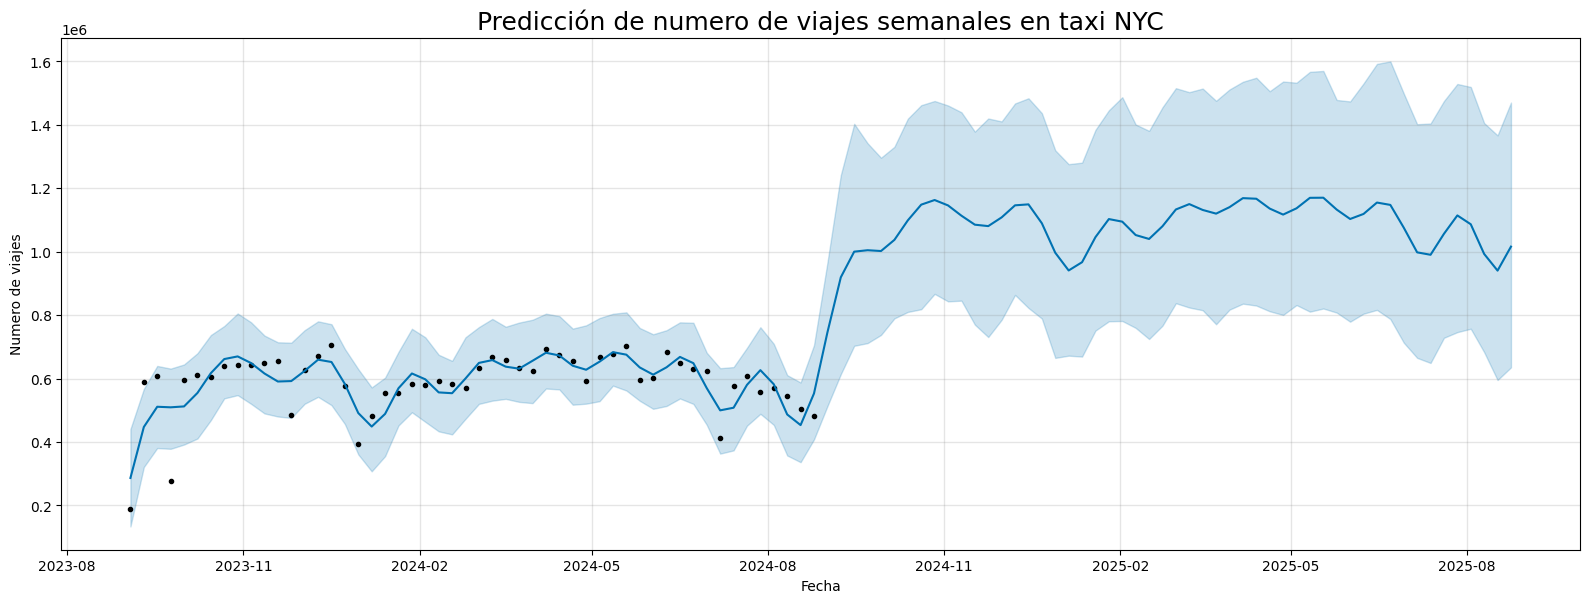

In [20]:
# plot forecasts

prophet_2.plot(forecast_2, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes semanales en taxi NYC', fontsize = 18)
plt.show()

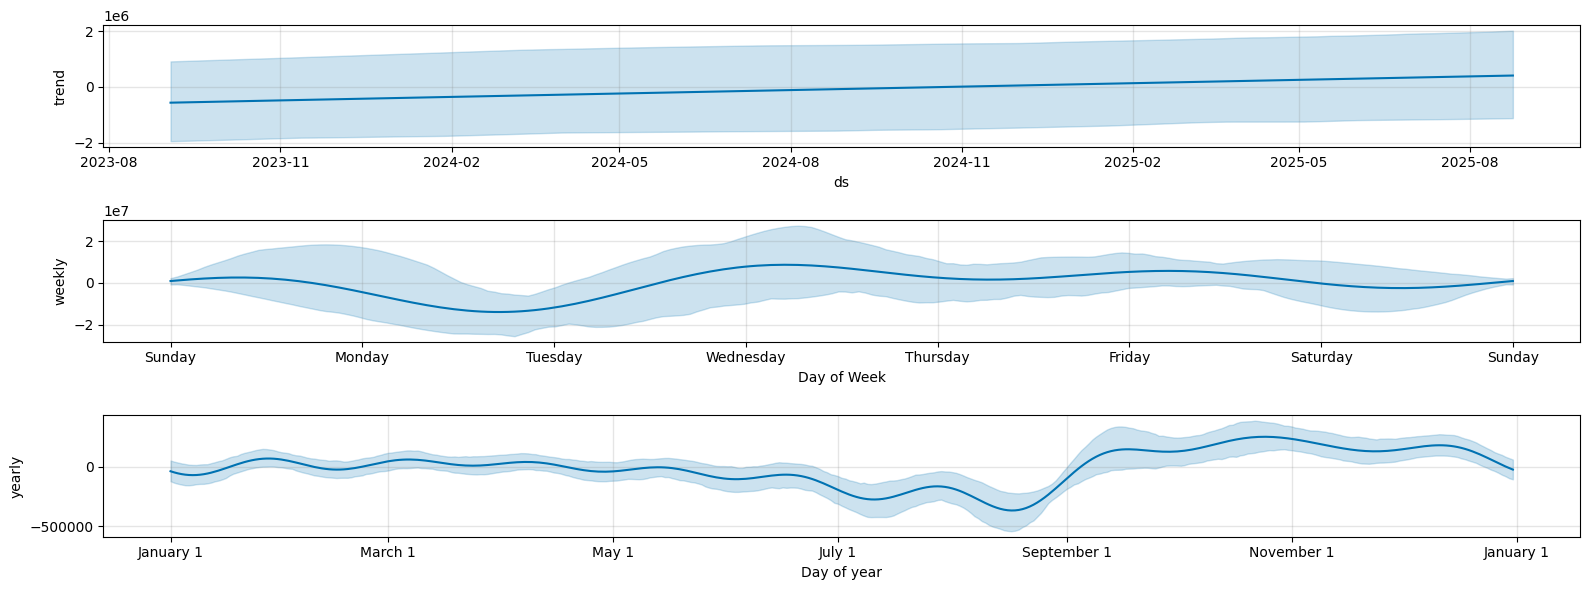

In [21]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_2.plot_components(forecast_2, figsize=(16,6))

## Evaluacion

In [23]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

### Modelo 1

In [62]:
df_cv_1 = cross_validation(prophet_1, initial = '120 days', horizon = '120 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2024-02-27 00:00:00 and 2024-04-27 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/clozs517.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/33lmtvy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85602', 'data', 'file=/tmp/tmph6xbzut0/clozs517.json', 'init=/tmp/tmph6xbzut0/33lmtvy4.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_modelalpw5y8a/prophet_model-20241113210634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/82vzvtyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/_bwv8e1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:runni

In [63]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-03-03,7.774149e+05,7.478589e+05,8.099788e+05,632791,2024-02-27
1,2024-03-10,1.284158e+06,1.248103e+06,1.333255e+06,668040,2024-02-27
2,2024-03-17,1.764511e+06,1.722796e+06,1.807447e+06,657963,2024-02-27
3,2024-03-24,1.661698e+06,1.617566e+06,1.714577e+06,634698,2024-02-27
4,2024-03-31,8.270034e+05,7.842786e+05,8.538325e+05,624566,2024-02-27
5,2024-04-07,-1.169139e+05,-1.568855e+05,-8.901100e+04,692092,2024-02-27
6,2024-04-14,-2.848483e+05,-3.093600e+05,-2.517580e+05,673231,2024-02-27
7,2024-04-21,4.917133e+05,4.489335e+05,5.327515e+05,655850,2024-02-27
8,2024-04-28,1.343248e+06,1.306377e+06,1.377487e+06,591377,2024-02-27
9,2024-05-05,1.241208e+06,1.207432e+06,1.282922e+06,668479,2024-02-27


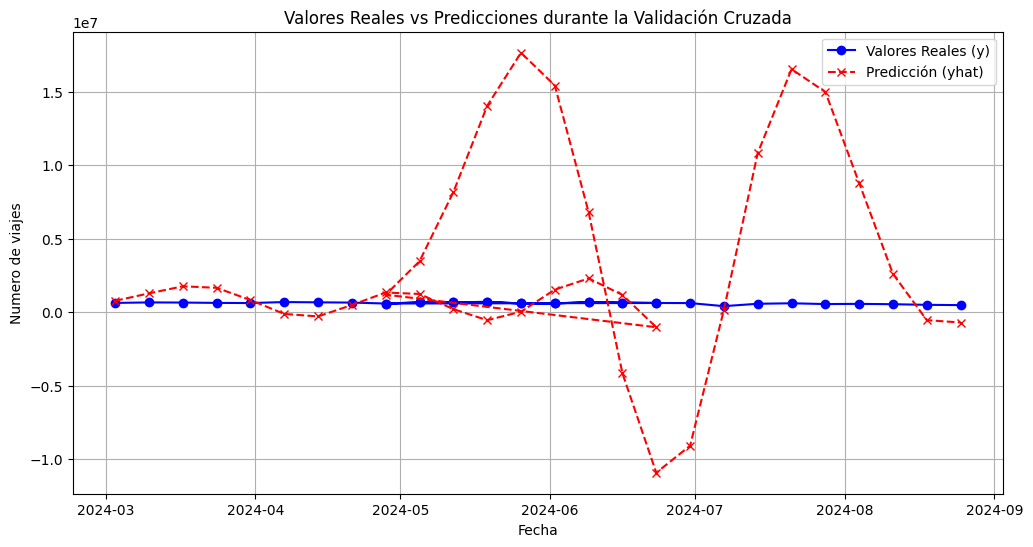

In [64]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
df_p_1 = performance_metrics(df_cv_1)
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,33,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000,33.0
mean,64 days 05:49:05.454545455,5.136235e+13,6.219393e+06,4.644215e+06,7.556253,5.829214,1.386087,0.0
std,33 days 20:15:51.032040208,4.845882e+13,3.616325e+06,2.897632e+06,4.806046,7.264569,0.345574,0.0
min,8 days 00:00:00,2.017465e+11,4.491620e+05,4.282737e+05,0.713595,0.685496,0.730123,0.0
25%,36 days 00:00:00,1.302318e+13,3.608765e+06,2.630192e+06,3.853033,1.423106,1.151316,0.0
50%,64 days 00:00:00,3.513236e+13,5.927256e+06,3.965715e+06,6.631452,2.068772,1.382980,0.0
75%,92 days 00:00:00,7.843842e+13,8.856547e+06,6.097766e+06,10.185431,7.397982,1.592426,0.0
max,120 days 00:00:00,1.703665e+14,1.305245e+07,1.069825e+07,17.872308,25.962082,2.000000,0.0


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


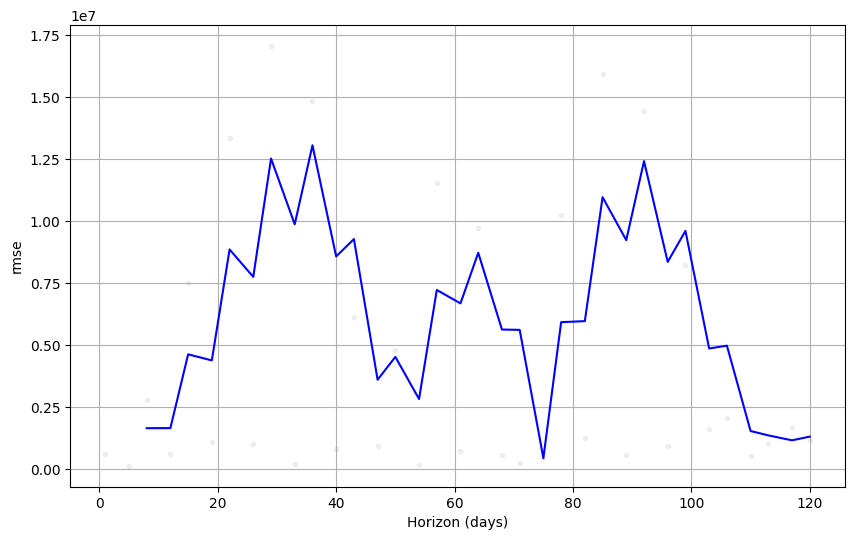

In [66]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [67]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 6219392.638561591


In [68]:
df_p_1 = performance_metrics(df_cv_1, rolling_window = 1)
df_p_1

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,120 days,4.848712e+13,6.963269e+06,4.429966e+06,7.217764,2.068772,1.378853,0.0


### Modelo 2

In [55]:
df_cv_2 = cross_validation(prophet_2, initial = '120 days', horizon = '120 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2024-02-27 00:00:00 and 2024-04-27 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/28sgc7xy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/zhnko9wd.json
21:05:20 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=69913', 'data', 'file=/tmp/tmph6xbzut0/28sgc7xy.json', 'init=/tmp/tmph6xbzut0/zhnko9wd.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_modela1qabgcl/prophet_model-20241113210520_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=69913', 'data', 'file=/tmp/tmph6xbzut0/28sgc7xy.json', 'init=/tmp/tmph6xbzut0/zhnko9wd.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_modela1qabgcl/prophet_model-20241113210520_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:05:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=69913', 'data', 'file=/tmp/tmph6xbzut0/28sgc7xy.json', 'init=/tmp/tmph6xbzut0/zhnko9wd.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_modela1qabgcl/prophet_model-20241113210520_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph6xbzut0/prophet_modela1qabgcl/prophet_model-20241113210520_1.csv
 console_msgs (if any):
	/tmp/tmph6xbzut0/prophet_modela1qabgcl/prophet_model-20241113210520_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/hgd9drbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xbzut0/0h_n38t0.json
21:05:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22688', 'data', 'file=/tmp/tmph6xbzut0/hgd9drbw.json', 'init=/tmp/tmph6xbzut0/0h_n38t0.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model2ajkofip/prophet_model-20241113210525_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=22688', 'data', 'file=/tmp/tmph6xbzut0/hgd9drbw.json', 'init=/tmp/tmph6xbzut0/0h_n38t0.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model2ajkofip/prophet_model-20241113210525_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:05:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22688', 'data', 'file=/tmp/tmph6xbzut0/hgd9drbw.json', 'init=/tmp/tmph6xbzut0/0h_n38t0.json', 'output', 'file=/tmp/tmph6xbzut0/prophet_model2ajkofip/prophet_model-20241113210525_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmph6xbzut0/prophet_model2ajkofip/prophet_model-20241113210525_1.csv
 console_msgs (if any):
	/tmp/tmph6xbzut0/prophet_model2ajkofip/prophet_model-20241113210525_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [56]:
df_cv_2


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-03-03,8.933839e+05,-2.037406e+05,1.920677e+06,632791,2024-02-27
1,2024-03-10,1.739439e+06,-2.537435e+06,5.495973e+06,668040,2024-02-27
2,2024-03-17,2.646469e+06,-7.410177e+06,1.203256e+07,657963,2024-02-27
3,2024-03-24,2.586640e+06,-1.425795e+07,1.776885e+07,634698,2024-02-27
4,2024-03-31,9.761021e+05,-2.389977e+07,1.789251e+07,624566,2024-02-27
5,2024-04-07,-1.361177e+06,-3.178515e+07,2.069108e+07,692092,2024-02-27
6,2024-04-14,-2.517015e+06,-3.397473e+07,2.698115e+07,673231,2024-02-27
7,2024-04-21,-1.174260e+06,-2.427931e+07,3.424510e+07,655850,2024-02-27
8,2024-04-28,1.880229e+06,-1.677059e+07,3.453796e+07,591377,2024-02-27
9,2024-05-05,4.061897e+06,-1.363392e+07,2.469348e+07,668479,2024-02-27


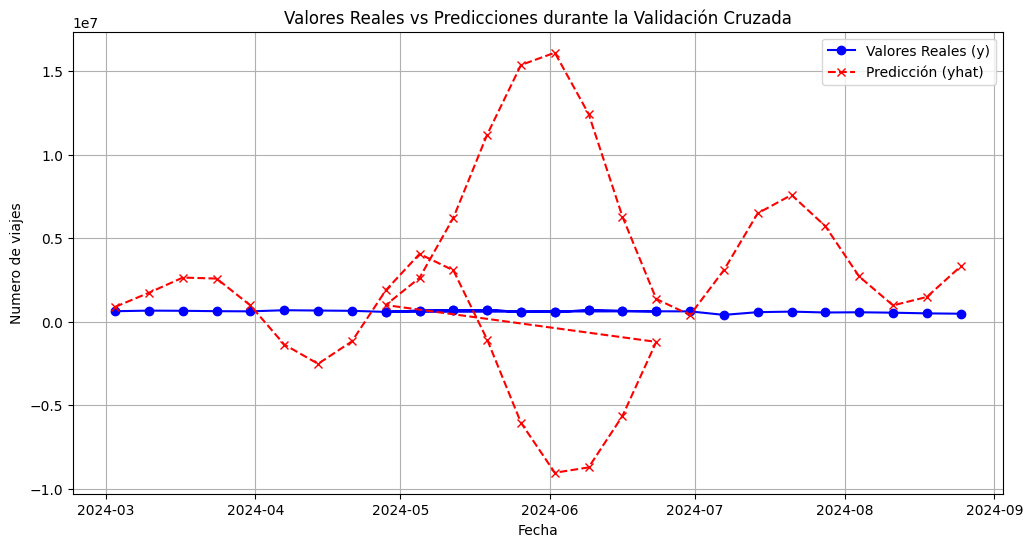

In [57]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_2['ds'], df_cv_2['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_2['ds'], df_cv_2['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
df_p_2 = performance_metrics(df_cv_2)
df_p_2.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,33,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000,33.000000
mean,64 days 05:49:05.454545455,3.685637e+13,5.297918e+06,4.444716e+06,7.126032,6.578039,1.454392,0.909091
std,33 days 20:15:51.032040208,3.782278e+13,3.010494e+06,2.522921e+06,4.048735,5.441407,0.343457,0.191353
min,8 days 00:00:00,7.509072e+11,8.665490e+05,7.482216e+05,1.234385,0.691890,0.681538,0.333333
25%,36 days 00:00:00,1.191199e+13,3.451376e+06,2.737120e+06,4.215800,2.913404,1.233511,1.000000
50%,64 days 00:00:00,2.896953e+13,5.382335e+06,3.992127e+06,6.769685,4.738709,1.492744,1.000000
75%,92 days 00:00:00,5.087792e+13,7.132876e+06,5.969549e+06,9.695062,9.677386,1.768570,1.000000
max,120 days 00:00:00,1.529481e+14,1.236722e+07,1.021070e+07,17.048142,24.778823,1.930619,1.000000


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


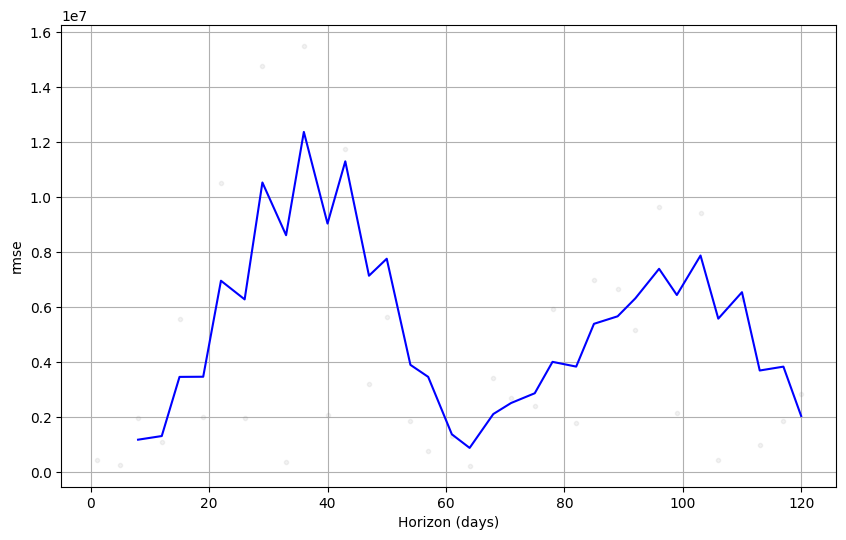

In [59]:
fig = plot_cross_validation_metric(df_cv_2, metric='rmse')

In [60]:
print('El RMSE es:', df_p_2.rmse.mean())

El RMSE es: 5297917.860242536


In [61]:
df_p_2 = performance_metrics(df_cv_2, rolling_window = 1)
df_p_2

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,120 days,3.493854e+13,5.910883e+06,4.272341e+06,6.875273,3.761274,1.431776,0.914286
